In [1]:
pip install neo4j


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install networkx


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scipy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
from neo4j import GraphDatabase

In [5]:
URI = "bolt://44.204.84.214"
AUTH = ("neo4j", "buzzes-mint-orders")

driver = GraphDatabase.driver(URI, auth=AUTH)
driver.verify_connectivity()
print("Connection established.")


Connection established.


In [6]:
from pathlib import Path
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
# CSV file path
file_path = "/workspace/Test_Python_Jupyter/mi_entorno/docs/Net_data_2.csv"  # Cambia esto por la ruta de tu archivo CSV
# read dataset
df = pd.read_csv(file_path)

geneinteraction_filepath = "/workspace/Test_Python_Jupyter/mi_entorno/docs/simulated_gene_interactions.csv"
df2= pd.read_csv(geneinteraction_filepath)

In [8]:
#build empty graph
G = nx.Graph()

In [9]:
# Diccionario de pesos para las relaciones
relation_weights = {
    "PRESENTED": 2,         # Peso bajo
    "INVOLVED_IN": 2,       # Peso medio
    "same_pathway": 3,    # Peso muy bajo
    "coexpression": 10,    # Peso alto
    "regulation": 5        # Peso medio
}


# Procesar los datos y agregar nodos y relaciones
for _, row in df.iterrows():
    author = row['author']
    trait = row['traitName']
    genes = row['mappedGenes'].split(',')  # Separar los genes por coma
    
    for gene in genes:
        gene = gene.strip()  # Limpiar espacios
        
        # Agregar nodos con etiquetas
        G.add_node(author, label="Author")  # Nodo del autor
        G.add_node(gene, label="Gene")      # Nodo del gen
        G.add_node(trait, label="Trait")    # Nodo del rasgo
        
        # Agregar aristas dirigidas con relaciones y pesos
        G.add_edge(author, gene, relation="PRESENTED", weight=relation_weights.get("PRESENTED", 1))  # author → gene
        G.add_edge(gene, trait, relation="INVOLVED_IN", weight=relation_weights.get("INVOLVED_IN", 1))  # gene → trait

# Procesar las interacciones entre genes
for _, row in df2.iterrows():
    gene1 = row['gene1']
    gene2 = row['gene2']
    interaction_type = row['interaction_type']
    
    # Agregar nodos si no existen
    if not G.has_node(gene1):
        G.add_node(gene1, label="Gene")
    if not G.has_node(gene2):
        G.add_node(gene2, label="Gene")
    
    # Agregar aristas con el tipo de interacción y peso
    G.add_edge(gene1, gene2, relation=interaction_type, weight=relation_weights.get(interaction_type, 1))


In [10]:
# Contar nodos por tipo
author_count = sum(1 for _, data in G.nodes(data=True) if data.get('label') == "Author")
gene_count = sum(1 for _, data in G.nodes(data=True) if data.get('label') == "Gene")
trait_count = sum(1 for _, data in G.nodes(data=True) if data.get('label') == "Trait")

# Resumen del grafo
print(f"Resumen del Grafo:")
print(f"Total de nodos: {G.number_of_nodes()}")
print(f" - Nodos de tipo 'Author': {author_count}")
print(f" - Nodos de tipo 'Gene': {gene_count}")
print(f" - Nodos de tipo 'Trait': {trait_count}")
print(f"Total de aristas: {G.number_of_edges()}")


# Crear un diccionario de pesos de las aristas
edge_weights = {(u, v): data['weight'] for u, v, data in G.edges(data=True) if 'weight' in data}

# Ordenar las aristas por valor del peso
sorted_edges = sorted(edge_weights.items(), key=lambda x: x[1])

print("\nDiccionario de pesos de las aristas ordenado por peso:", ", ".join([f"{edge}: {weight}" for edge, weight in sorted_edges]))

# Buscar aristas con peso específico
peso_deseado = 5
nodos_con_peso_deseado = [(u, v) for (u, v), weight in edge_weights.items() if weight == peso_deseado]
print(f"\nNodos conectados por aristas con peso {peso_deseado}:")
print(nodos_con_peso_deseado)

Resumen del Grafo:
Total de nodos: 2265
 - Nodos de tipo 'Author': 7
 - Nodos de tipo 'Gene': 2176
 - Nodos de tipo 'Trait': 82
Total de aristas: 13485

Diccionario de pesos de las aristas ordenado por peso: ('Mez J', 'RPS20P25'): 2, ('Mez J', 'RPS19P6'): 2, ('Mez J', 'TMEM94'): 2, ('Mez J', 'PLCL1'): 2, ('Mez J', 'GPR180'): 2, ('Mez J', 'HMG20A'): 2, ('Mez J', 'LINGO1'): 2, ('Mez J', 'LINC00624'): 2, ('Mez J', 'BAALC'): 2, ('Mez J', 'BAALC-AS1'): 2, ('Mez J', 'OR7E39P'): 2, ('Mez J', 'CCZ1B'): 2, ('Mez J', 'MCPH1-AS1'): 2, ('Mez J', 'GRIK2'): 2, ('Mez J', 'R3HDM2P2'): 2, ('Mez J', 'Y_RNA'): 2, ('Mez J', 'RNU6-1213P'): 2, ('Mez J', 'CDH7'): 2, ('Mez J', 'PRPF19P1'): 2, ('Mez J', 'CPSF6'): 2, ('Mez J', 'CPM'): 2, ('Mez J', 'SCAPER'): 2, ('Mez J', 'CTNNA1P1'): 2, ('Mez J', 'CCDC112'): 2, ('Mez J', 'MIR7702'): 2, ('Mez J', 'RNY4P18'): 2, ('Mez J', 'SESTD1'): 2, ('Mez J', 'RAD52P1'): 2, ('Mez J', 'ROBO2P1'): 2, ('Mez J', 'CICP17'): 2, ('Mez J', 'SEC24B-AS1'): 2, ('Mez J', 'CASP12'): 2, ('M

In [11]:
# Verificar entre qué tipos de nodos hay aristas
edge_types = {"Author->Gene": 0, "Gene->Trait": 0, "Author->Trait": 0, "Gene->Gene": 0}

# Iterar sobre las aristas y contar las relaciones entre los tipos de nodos
for u, v, data in G.edges(data=True):
    # Verificar los tipos de nodos conectados por la arista
    if G.nodes[u].get('label') == 'Author' and G.nodes[v].get('label') == 'Gene':
        edge_types["Author->Gene"] += 1
    elif G.nodes[u].get('label') == 'Gene' and G.nodes[v].get('label') == 'Trait':
        edge_types["Gene->Trait"] += 1
    elif G.nodes[u].get('label') == 'Author' and G.nodes[v].get('label') == 'Trait':
        edge_types["Author->Trait"] += 1
    elif G.nodes[u].get('label') == 'Gene' and G.nodes[v].get('label') == 'Gene':
        edge_types["Gene->Gene"] += 1

# Imprimir el tipo de relaciones entre nodos
print(f"\nTipos de relaciones entre nodos:")
print(f" - Aristas de tipo 'Author' → 'Gene': {edge_types['Author->Gene']}")
print(f" - Aristas de tipo 'Gene' → 'Trait': {edge_types['Gene->Trait']}")
print(f" - Aristas de tipo 'Author' → 'Trait': {edge_types['Author->Trait']}")
print(f" - Aristas de tipo 'Gene' → 'Gene': {edge_types['Gene->Gene']}")



Tipos de relaciones entre nodos:
 - Aristas de tipo 'Author' → 'Gene': 2176
 - Aristas de tipo 'Gene' → 'Trait': 829
 - Aristas de tipo 'Author' → 'Trait': 0
 - Aristas de tipo 'Gene' → 'Gene': 7623


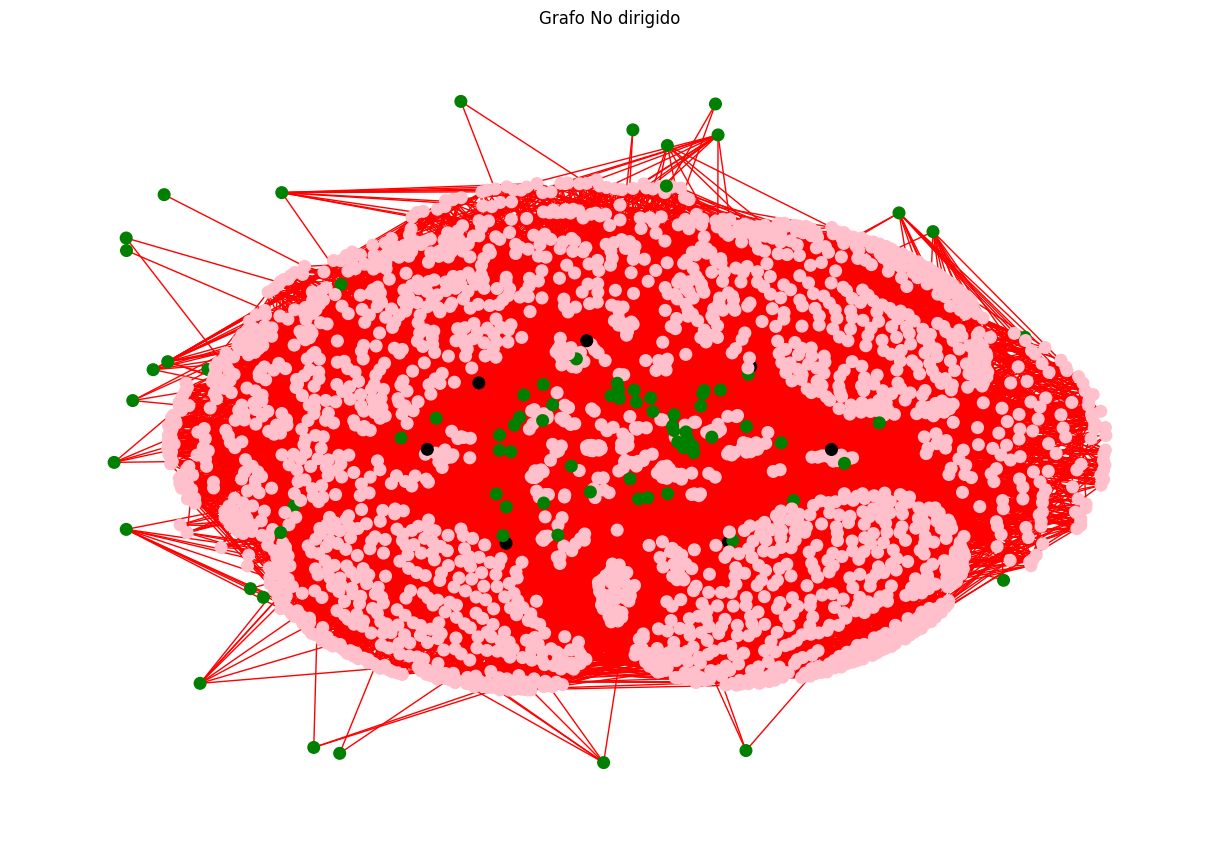

In [14]:
# Asignar colores según el tipo de nodo
node_colors = []
for _, data in G.nodes(data=True):
    if data.get('label') == "Author":
        node_colors.append("black")  # Color para 'Author'
    elif data.get('label') == "Gene":
        node_colors.append("pink")  # Color para 'Gene'
    elif data.get('label') == "Trait":
        node_colors.append("green")  # Color para 'Trait'

# Dibujar el grafo
plt.figure(figsize=(12, 8))
pos = nx.kamada_kawai_layout(G)  # Layout del grafo
nx.draw(
    G, pos,
    with_labels=False,
    node_size=70,
    node_color=node_colors,  # Colores asignados
    edge_color="red",
    font_size=10,
    font_color="black"
)
plt.title("Grafo No dirigido")
plt.show()

# Prueba para ejecutar algoritmos directamente en networkX

In [25]:
# Obtener la lista de nodos cuyo label es "Author"
authors = [node for node, data in G.nodes(data=True) if data.get('label') == "Author"]
print(authors)

# Obtener nodos de tipo "Author"
authors = [node for node, data in G.nodes(data=True) if data.get('label') == "Author"]

# Obtener nodos de tipo "Trait"
traits = [node for node, data in G.nodes(data=True) if data.get('label') == "Trait"]
print(traits)

# Combinar ambos como nodos terminales
terminal_nodes = authors + traits



['Mez J', 'Jansen IE', 'Jun GR', 'Herold C', 'Fongang B', 'Adewuyi EO', 'Gouveia C']
["Late-onset Alzheimer's disease", "Alzheimer's disease (late onset)", 'Late-onset AlzheimerΓÇÖs disease in APOEe4 non-carriers', "Late-onset Alzheimer's disease (adjusted for APOE)", "Alzheimer's disease", "Alzheimer's disease in APOE e4+ carriers", "Alzheimer's disease in APOE e4- carriers", 'Brain structure (temporal lobe volume)', "Alzheimer's disease (cognitive decline)", "Alzheimer's disease in hypertension-negative individuals", "Alzheimer's disease in hypertension", 'AlzheimerΓÇÖs disease (clinical subgroup AD+)', 'AlzheimerΓÇÖs disease (clinical subgroup AD++)', 'AlzheimerΓÇÖs disease (clinical subgroup AD+++)', "Alzheimer's disease (MTAG)", "Alzheimer's disease pathology", "Alzheimer's disease with no specific cognitive domain impairment", "Alzheimer's disease (SNP x SNP interaction)", "Alzheimer's disease (onset at age over 80)", "Alzheimer's disease (onset between ages 58 and 79)", "Rapidly

In [26]:
from networkx.algorithms.approximation.steinertree import steiner_tree

# Calcular el árbol de Steiner teniendo en cuenta los pesos
steiner_subtree_mehlhorn = steiner_tree(G, terminal_nodes, weight="weight")

# Clasificar los nodos remanentes en el árbol de Steiner por tipo
nodes_by_type = {
    "Author": [],
    "Gene": [],
    "Trait": []
}

for node, data in steiner_subtree_mehlhorn.nodes(data=True):
    label = data.get('label')
    if label in nodes_by_type:
        nodes_by_type[label].append(node)

# Mostrar los nodos por tipo
for label, nodes in nodes_by_type.items():
    print(f"Nodos de tipo {label}: {nodes}")
    print(f"Cantidad: {len(nodes)}")

# Resumen del árbol de Steiner
print("\nResumen del Árbol de Steiner:")
print(f"Total de nodos: {steiner_subtree_mehlhorn.number_of_nodes()}")
print(f"Total de aristas: {steiner_subtree_mehlhorn.number_of_edges()}")


Nodos de tipo Author: ['Jansen IE', 'Gouveia C', 'Adewuyi EO', 'Fongang B', 'Herold C', 'Jun GR', 'Mez J']
Cantidad: 7
Nodos de tipo Gene: ['BIN1', 'TMEM106B', 'MYOZ2', 'CCT3', 'ADAM10', 'RN7SKP120', 'APOC1', 'MPDZ', 'CNTNAP2', 'RPS20P25', 'PDS5B', 'HLA-DQA1', 'MYRIP', 'LINC01960', 'LINC02103', 'CCNT2-AS1', 'TACR3', 'APOE', 'INPP5D', 'CEACAM16-AS1', 'ACE', 'AGT', 'COP1', 'USP6NL-AS1', 'PICALM', 'LINC01725', 'ZNF292', 'RNU6-679P', 'MS4A2', 'PRRC2C', 'GRIN2B', 'LINC02695', 'ZNF652-AS1', 'Metazoa_SRP', 'CASS4', 'CNN3-DT', '-', 'MTARC2P1', 'CYYR1', 'IL19', 'APOC1P1', 'PPIAP55', 'TLN2 x WWC1', 'LINC00923', 'EPHA1-AS1', 'HDAC9', 'SLC44A5', 'DAB1', 'ADAMTS4', 'CR1', 'MTMR2', 'DOC2A', 'CDC42EP3-AS1', 'TREM2', 'SPPL2A', 'RNU6-362P', 'RAB31', 'TOMM40', 'ARL17B', 'SLC35C1', 'CACNA1A', 'PTK2B', 'AHNAK', 'OTX2P1', 'MS4A4A', 'ERBB4', 'MECOM']
Cantidad: 67
Nodos de tipo Trait: ["Alzheimer's disease or systolic blood pressure (pleiotropy)", "Rapidly progressive Alzheimer's disease (clinical vs typical

In [27]:
# Verificar entre qué tipos de nodos hay aristas
edge_types = {"Author->Gene": 0, "Gene->Trait": 0, "Author->Trait": 0, "Gene->Gene": 0}

# Iterar sobre las aristas y contar las relaciones entre los tipos de nodos
for u, v, data in steiner_subtree_mehlhorn.edges(data=True):
    # Verificar los tipos de nodos conectados por la arista
    if steiner_subtree_mehlhorn.nodes[u].get('label') == 'Author' and steiner_subtree_mehlhorn.nodes[v].get('label') == 'Gene':
        edge_types["Author->Gene"] += 1
    elif steiner_subtree_mehlhorn.nodes[u].get('label') == 'Gene' and steiner_subtree_mehlhorn.nodes[v].get('label') == 'Trait':
        edge_types["Gene->Trait"] += 1
    elif steiner_subtree_mehlhorn.nodes[u].get('label') == 'Author' and steiner_subtree_mehlhorn.nodes[v].get('label') == 'Trait':
        edge_types["Author->Trait"] += 1
    elif steiner_subtree_mehlhorn.nodes[u].get('label') == 'Gene' and steiner_subtree_mehlhorn.nodes[v].get('label') == 'Gene':
        edge_types["Gene->Gene"] += 1

# Imprimir el tipo de relaciones entre nodos
print(f"\nTipos de relaciones entre nodos:")
print(f" - Aristas de tipo 'Author' → 'Gene': {edge_types['Author->Gene']}")
print(f" - Aristas de tipo 'Gene' → 'Trait': {edge_types['Gene->Trait']}")
print(f" - Aristas de tipo 'Author' → 'Trait': {edge_types['Author->Trait']}")
print(f" - Aristas de tipo 'Gene' → 'Gene': {edge_types['Gene->Gene']}")




Tipos de relaciones entre nodos:
 - Aristas de tipo 'Author' → 'Gene': 9
 - Aristas de tipo 'Gene' → 'Trait': 44
 - Aristas de tipo 'Author' → 'Trait': 0
 - Aristas de tipo 'Gene' → 'Gene': 0


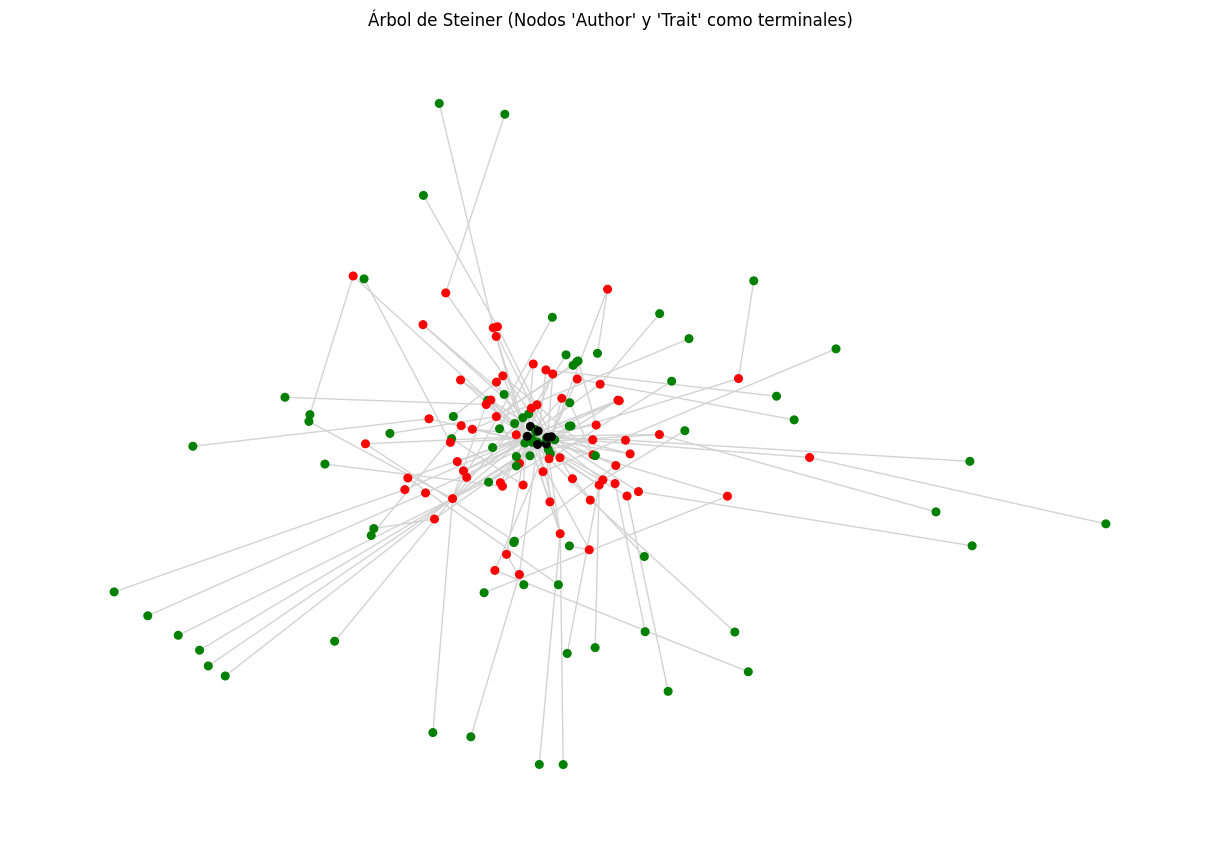

In [28]:
# Colores para los nodos según el tipo
node_colors = [
    "black" if data["label"] == "Author" else
    "green" if data["label"] == "Trait" else
    "red" for _, data in steiner_subtree_mehlhorn.nodes(data=True)
]

# Graficar el grafo
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
nx.draw(
    steiner_subtree_mehlhorn,
    pos,
    with_labels=False,
    labels={node: node for node in steiner_subtree_mehlhorn.nodes},
    node_size=30,
    node_color=node_colors,
    edge_color="lightgray",  # Color de los enlaces
    font_size=8,
    font_color="black"
)

# Título
plt.title("Árbol de Steiner (Nodos 'Author' y 'Trait' como terminales)")
plt.show()

# pruebas para ejecutar algoritmos en Neo4j 

In [18]:
# 1. proyectar el grafo a NEO4J

def create_node(tx, node_id, label):
    query = f"""
    MERGE (n:{label} {{id: $node_id}})
    """
    tx.run(query, node_id=node_id)

def create_relationship(tx, source_id, target_id, relation):
    query = f"""
    MATCH (a {{id: $source_id}}), (b {{id: $target_id}})
    MERGE (a)-[:{relation}]->(b)
    """
    tx.run(query, source_id=source_id, target_id=target_id)
    
def import_graph_to_neo4j(graph, driver):
    with driver.session() as session:
        # Limpiar la base de datos de Neo4j
        session.run("MATCH (n) DETACH DELETE n")
        # Crear nodos
        for node, data in graph.nodes(data=True):
            label = data["label"]
            session.write_transaction(create_node, node, label)
        
        # Crear relaciones con las nuevas reglas
        for source, target, data in graph.edges(data=True):
            relation = data.get("relation")
            
            # Relación 'PRESENTED' entre Author y Gene
            if relation == "PRESENTED":
                if graph.nodes[source]['label'] == 'Author' and graph.nodes[target]['label'] == 'Gene':
                    session.write_transaction(create_relationship, source, target, relation)
            
            # Relación 'INVOLVED_IN' entre Gene y Trait
            elif relation == "INVOLVED_IN":
                if graph.nodes[source]['label'] == 'Gene' and graph.nodes[target]['label'] == 'Trait':
                    session.write_transaction(create_relationship, source, target, relation)

# Importar el grafo a Neo4j con relaciones dirigidas correctamente
import_graph_to_neo4j(G, driver)


/tmp/ipykernel_612/999747118.py:23: DeprecationWarning: write_transaction has been renamed to execute_write
  session.write_transaction(create_node, node, label)
/tmp/ipykernel_612/999747118.py:32: DeprecationWarning: write_transaction has been renamed to execute_write
  session.write_transaction(create_relationship, source, target, relation)
/tmp/ipykernel_612/999747118.py:37: DeprecationWarning: write_transaction has been renamed to execute_write
  session.write_transaction(create_relationship, source, target, relation)


In [12]:
def create_node(tx, node_id, label):
    query = f"""
    MERGE (n:{label} {{id: $node_id}})
    """
    tx.run(query, node_id=node_id)

def create_relationship(tx, source_id, target_id, relation, weight):
    query = f"""
    MATCH (a {{id: $source_id}}), (b {{id: $target_id}})
    MERGE (a)-[r:{relation}]->(b)
    SET r.weight = $weight
    """
    tx.run(query, source_id=source_id, target_id=target_id, relation=relation, weight=weight)

def import_graph_to_neo4j(graph, driver):
    with driver.session() as session:
        # Limpiar la base de datos de Neo4j
        session.run("MATCH (n) DETACH DELETE n")
        
        # Crear nodos
        for node, data in graph.nodes(data=True):
            label = data["label"]
            session.write_transaction(create_node, node, label)
        
        # Crear relaciones con pesos
        for source, target, data in graph.edges(data=True):
            relation = data.get("relation")
            weight = data.get("weight", 1)  # Obtener el peso de la relación (valor por defecto 1)
            
            # Relación 'PRESENTED' entre Author y Gene
            if relation == "PRESENTED":
                if graph.nodes[source]['label'] == 'Author' and graph.nodes[target]['label'] == 'Gene':
                    session.write_transaction(create_relationship, source, target, relation, weight)
            
            # Relación 'INVOLVED_IN' entre Gene y Trait
            elif relation == "INVOLVED_IN":
                if graph.nodes[source]['label'] == 'Gene' and graph.nodes[target]['label'] == 'Trait':
                    session.write_transaction(create_relationship, source, target, relation, weight)
            
            # Relación entre genes (interacciones entre genes)
            elif relation in ["same_pathway", "coexpression", "regulation"]:  # Agrega aquí todos los tipos de interacción entre genes
                if graph.nodes[source]['label'] == 'Gene' and graph.nodes[target]['label'] == 'Gene':
                    session.write_transaction(create_relationship, source, target, relation, weight)

# Importar el grafo a Neo4j con relaciones dirigidas y pesos correctamente
import_graph_to_neo4j(G, driver)

/tmp/ipykernel_1498/2989468570.py:23: DeprecationWarning: write_transaction has been renamed to execute_write
  session.write_transaction(create_node, node, label)
/tmp/ipykernel_1498/2989468570.py:33: DeprecationWarning: write_transaction has been renamed to execute_write
  session.write_transaction(create_relationship, source, target, relation, weight)
/tmp/ipykernel_1498/2989468570.py:38: DeprecationWarning: write_transaction has been renamed to execute_write
  session.write_transaction(create_relationship, source, target, relation, weight)
/tmp/ipykernel_1498/2989468570.py:43: DeprecationWarning: write_transaction has been renamed to execute_write
  session.write_transaction(create_relationship, source, target, relation, weight)


In [27]:

def run_cypher_query(driver, query):
    """Ejecuta una consulta Cypher en Neo4j."""
    with driver.session() as session:
        result = session.run(query)
        return [record.data() for record in result]

# Consulta para proyectar el grafo
projection_query = """
CALL gds.graph.project(
    'my_graph',                   
    ['Author', 'Gene', 'Trait'], 
    ['PRESENTED', 'INVOLVED_IN'] 
)
"""

# Ejecutar la proyección
run_cypher_query(driver, projection_query)
print("Grafo proyectado en GDS como 'myGraph'")

Grafo proyectado en GDS como 'myGraph'


In [13]:
def run_cypher_query(driver, query):
    """Ejecuta una consulta Cypher en Neo4j."""
    with driver.session() as session:
        result = session.run(query)
        return [record.data() for record in result]

# Consulta para proyectar el grafo incluyendo los pesos en las relaciones
projection_query = """
CALL gds.graph.project(
    'my_graph',                    
    ['Author', 'Gene', 'Trait'],   
    ['PRESENTED', 'INVOLVED_IN', 'same_pathway', 'coexpression', 'regulation'],  
    {
        relationshipProperties: ['weight']  
    }
)
"""

# Ejecutar la proyección
run_cypher_query(driver, projection_query)
print("Grafo proyectado en GDS como 'my_graph' con pesos en las relaciones.")


Grafo proyectado en GDS como 'my_graph' con pesos en las relaciones.


In [29]:
# Verificar la proyección
verify_query = """
CALL gds.graph.list()
"""
result = run_cypher_query(driver, verify_query)
print("Grafos proyectados:")
for record in result:
    print(record)


Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: The query used a deprecated field from a procedure. ('schema' returned by 'gds.graph.list' is deprecated.)} {position: line: 2, column: 1, offset: 1} for query: '\nCALL gds.graph.list()\n'


Grafos proyectados:
{'degreeDistribution': {'min': 0, 'max': 370, 'p90': 1, 'p999': 180, 'p99': 20, 'p50': 0, 'p75': 0, 'p95': 3, 'mean': 1.2122683142100619}, 'graphName': 'Graph_projected', 'database': 'neo4j', 'databaseLocation': 'local', 'memoryUsage': '1675 KiB', 'sizeInBytes': 1715632, 'nodeCount': 2266, 'relationshipCount': 2747, 'configuration': {'relationshipProjection': {'INVOLVED_IN': {'aggregation': 'DEFAULT', 'orientation': 'NATURAL', 'indexInverse': False, 'properties': {}, 'type': 'INVOLVED_IN'}, 'PRESENTED': {'aggregation': 'DEFAULT', 'orientation': 'NATURAL', 'indexInverse': False, 'properties': {}, 'type': 'PRESENTED'}}, 'readConcurrency': 4, 'relationshipProperties': {}, 'nodeProperties': {}, 'jobId': 'fdb95886-3050-4f19-a598-c42e6cfd0f23', 'nodeProjection': {'Gene': {'label': 'Gene', 'properties': {}}, 'Trait': {'label': 'Trait', 'properties': {}}, 'Author': {'label': 'Author', 'properties': {}}}, 'logProgress': True, 'validateRelationships': False, 'sudo': False}, '

In [37]:
def run_cypher_query(driver, query, params=None):
    """Ejecuta una consulta Cypher en Neo4j."""
    with driver.session() as session:
        result = session.run(query, params)
        return [record.data() for record in result]

# Obtener nodos terminales y objetivos
terminal_query = """
MATCH (a:Author)-[:INVOLVED_IN|PRESENTED*]->(g:Gene)-[:INVOLVED_IN|PRESENTED*]->(t:Trait)
RETURN collect(id(a)) AS sourceNodes, collect(id(t)) AS targetNodes
"""
terminal_nodes_result = run_cypher_query(driver, terminal_query)
source_nodes = terminal_nodes_result[0]["sourceNodes"]
target_nodes = terminal_nodes_result[0]["targetNodes"]

# Selecciona un nodo fuente (sourceNode) arbitrario
source_node = source_nodes[0]

# Ejecutar el algoritmo Steiner Tree
steiner_tree_query = """
CALL gds.steinerTree.stream('Graph_projected', {
    sourceNode: $sourceNode,
    targetNodes: $targetNodes,
    relationshipWeightProperty: null
})
YIELD nodeId, parentId, weight
RETURN gds.util.asNode(nodeId).id AS node, 
       gds.util.asNode(parentId).id AS parent, 
       weight
ORDER BY node
"""
params = {"sourceNode": source_node, "targetNodes": target_nodes}
steiner_tree_result = run_cypher_query(driver, steiner_tree_query, params)

# Mostrar resultados
for record in steiner_tree_result:
    print("Nodo:", record["node"])
    print("Padre:", record["parent"])
    print("Peso:", record["weight"])


Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: The query used a deprecated function: `id`.} {position: line: 3, column: 16, offset: 106} for query: '\nMATCH (a:Author)-[:INVOLVED_IN|PRESENTED*]->(g:Gene)-[:INVOLVED_IN|PRESENTED*]->(t:Trait)\nRETURN collect(id(a)) AS sourceNodes, collect(id(t)) AS targetNodes\n'
Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: The query used a deprecated function: `id`.} {position: line: 3, column: 47, offset: 137} for query: '\nMATCH (a:Author)-[:INVOLVED_IN|PRESENTED*]->(g:Gene)-[:INVOLVED_IN|PRESENTED*]->(t:Trait)\nRETURN collect(id(a)) AS sourceNodes, collect(id(t)) AS t

Nodo: Alzheimer's disease
Padre: MINDY2-DT
Peso: 1.0
Nodo: Dementia or Alzheimer's disease
Padre: IQCK
Peso: 1.0
Nodo: IQCK
Padre: Kunkle BW
Peso: 1.0
Nodo: Kunkle BW
Padre: Kunkle BW
Peso: 0.0
Nodo: MINDY2-DT
Padre: Kunkle BW
Peso: 1.0
Nodo: Rapidly progressive Alzheimer's disease (typical) (case-control set 2)
Padre: MINDY2-DT
Peso: 1.0


In [39]:
def run_cypher_query(driver, query, params=None):
    """Ejecuta una consulta Cypher en Neo4j."""
    with driver.session() as session:
        result = session.run(query, params)
        return [record.data() for record in result]

# Obtener nodos terminales y objetivos
terminal_query = """
MATCH (a:Author)-[:INVOLVED_IN|PRESENTED*]->(g:Gene)-[:INVOLVED_IN|PRESENTED*]->(t:Trait)
RETURN collect(id(a)) AS sourceNodes, collect(id(t)) AS targetNodes
"""
terminal_nodes_result = run_cypher_query(driver, terminal_query)

# Validar el contenido de source_nodes y target_nodes
source_nodes = terminal_nodes_result[0]["sourceNodes"]
target_nodes = terminal_nodes_result[0]["targetNodes"]
print(f"Nodos fuente obtenidos: {source_nodes}")
print(f"Nodos objetivo obtenidos: {target_nodes}")

# Ejecutar el algoritmo Steiner Tree para cada nodo fuente
steiner_tree_query = """
CALL gds.steinerTree.stream('Graph_projected', {
    sourceNode: $sourceNode,
    targetNodes: $targetNodes,
    relationshipWeightProperty: null
})
YIELD nodeId, parentId, weight
RETURN gds.util.asNode(nodeId).id AS node, 
       gds.util.asNode(parentId).id AS parent, 
       weight
ORDER BY node
"""

# Iterar sobre todos los nodos fuente y ejecutar el algoritmo
for i, source_node in enumerate(source_nodes):
    print(f"Ejecutando Steiner Tree para el nodo fuente {source_node} (índice {i})")
    
    params = {"sourceNode": source_node, "targetNodes": target_nodes}
    steiner_tree_result = run_cypher_query(driver, steiner_tree_query, params)
    
    # Mostrar resultados para el nodo fuente actual
    print(f"Resultados para el sourceNode {source_node}:")
    for record in steiner_tree_result:
        print("Nodo:", record["node"])
        print("Padre:", record["parent"])
        print("Peso:", record["weight"])
    print("\n")  # Separador entre resultados de diferentes nodos fuente


Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: The query used a deprecated function: `id`.} {position: line: 3, column: 16, offset: 106} for query: '\nMATCH (a:Author)-[:INVOLVED_IN|PRESENTED*]->(g:Gene)-[:INVOLVED_IN|PRESENTED*]->(t:Trait)\nRETURN collect(id(a)) AS sourceNodes, collect(id(t)) AS targetNodes\n'
Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: The query used a deprecated function: `id`.} {position: line: 3, column: 47, offset: 137} for query: '\nMATCH (a:Author)-[:INVOLVED_IN|PRESENTED*]->(g:Gene)-[:INVOLVED_IN|PRESENTED*]->(t:Trait)\nRETURN collect(id(a)) AS sourceNodes, collect(id(t)) AS t

Nodos fuente obtenidos: [46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 126, 126, 126, 126, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 166, 186, 186, 186, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 2304, 2304, 2304, 2304, 2304, 2304, 2304, 2304, 2304, 2304, 2304, 2304, 2304, 2304, 2304, 2304, 2304, 2304, 2304, 2304, 2304, 2304, 2304, 2304, 2304, 2304, 2304, 2304, 2304, 2304, 2304, 2